#                                       MOVIE RATING PREDICTION

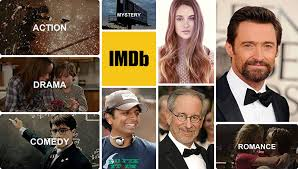

In [144]:
#IMPORTING NECESSARY LIBARIES
import numpy as np
import pandas as pd
import seaborn as sb
import plotly.express as px
import matplotlib.pyplot as mpl
from sklearn.model_selection import train_test_split

In [145]:
#READING THE GIVEN CSV FILE
movies = pd.read_csv(r'C:\Users\Lenovo\OneDrive\Desktop\movieratingprediction.csv', encoding='latin1')

In [146]:
#PRINTING THE CSV FILE
movies

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,-1988.0,NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,-1999.0,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,-2005.0,NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,-1988.0,NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [147]:
#PRINTING THE HEAD OF CSV FILE
movies.head(100)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
95,417 Miles,-2016.0,75 min,Drama,4.8,9,Mainak Dhar,Marilia Colturato,Kyara Jacob,Kyara Ralella Jacob
96,42 Kms.,-2009.0,NaN,"Drama, Sport",3.9,14,Nisha Chainani,Mandira Bedi,Bikram Saluja,Sammir Dattani
97,498A-The Wedding Gift,-2012.0,113 min,"Drama, Family, Musical",7.8,21,Suhaib Ilyasi,Srishti Gautam,Farida Jalal,Supriya Karnik
98,4pm on the Court,-2011.0,115 min,Sport,NaN,NaN,Shine Krishna,Ashish Bhatia,Naveen Kaushik,Vinay Sharma


In [148]:
#GETTING INFORMATION ABOUT DATATYPES USED
movies.dtypes

Name         object
Year        float64
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [149]:
#GENERATING STATISTICAL DESCRIPTION OF A SERIES OBJECT
movies.describe()

,Year,Rating
count,14981.000000,7919.000000
mean,-1987.012215,5.841621
std,25.416689,1.381777
min,-2022.000000,1.100000
25%,-2009.000000,4.900000
50%,-1991.000000,6.000000
75%,-1968.000000,6.800000
max,-1913.000000,10.000000


In [150]:
#CHECKING THE NULL VALUES
movies.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [151]:
#GETTING THE CURRENT SHAPE OF AN ARRAY 
movies.shape

(15509, 10)

In [152]:
#DROPPING THE NULL VALUES 
movies.dropna(inplace = True)

In [153]:
movies.head(100)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,-1997.0,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,-2005.0,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,-2012.0,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
178,Aa Dekhen Zara,-2009.0,117 min,"Action, Sci-Fi, Thriller",5.0,866,Jehangir Surti,Neil Nitin Mukesh,Bipasha Basu,Sophiya Chaudhary
179,Aa Gale Lag Jaa,-1973.0,148 min,"Action, Drama, Romance",7.2,348,Manmohan Desai,Shashi Kapoor,Sharmila Tagore,Shatrughan Sinha
180,Aa Gale Lag Jaa,-1994.0,158 min,"Mystery, Romance",4.4,115,Hamid Ali Khan,Jugal Hansraj,Urmila Matondkar,Paresh Rawal
181,Aa Gaya Hero,-2017.0,123 min,Action,2.7,339,Dipankar Senapati,Govinda,Richa Sharma,Poonam Pandey


In [154]:
#AGAIN CHECKING NULL VALUES
movies.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [155]:
#AGAIN CHECKING THE SHAPE OF AN ARRAY 
movies.shape

(5659, 10)

In [156]:
movies['Duration'] = movies['Duration'].str.extract('(\d+)')
movies['Duration'] = pd.to_numeric(movies['Duration'], errors='coerce')

In [157]:
movies["Duration"].head()

1    109
3    110
5    147
6    142
8     82
Name: Duration, dtype: int64

In [158]:
genre = movies['Genre']

In [159]:
genre.head(25)

1                         Drama
3               Comedy, Romance
5        Comedy, Drama, Musical
6           Drama, Romance, War
8     Horror, Mystery, Thriller
9       Action, Crime, Thriller
10                        Drama
11                       Horror
12    Horror, Romance, Thriller
13       Comedy, Drama, Romance
15                Comedy, Drama
18       Comedy, Drama, Romance
21        Crime, Drama, Mystery
22             Horror, Thriller
25               Comedy, Horror
28       Drama, Horror, Mystery
30                        Drama
32                        Drama
33             Action, Thriller
34                       Action
36                        Drama
38     Horror, Mystery, Romance
39              Horror, Mystery
40       Drama, Horror, Romance
41     Horror, Mystery, Romance
Name: Genre, dtype: object

In [160]:
genres = movies['Genre'].str.split(', ', expand=True)

In [161]:
genres.head(25)

,0,1,2
1,Drama,None,None
3,Comedy,Romance,None
5,Comedy,Drama,Musical
6,Drama,Romance,War
8,Horror,Mystery,Thriller
9,Action,Crime,Thriller
10,Drama,None,None
11,Horror,None,None
12,Horror,Romance,Thriller
13,Comedy,Drama,Romance


In [162]:
genre_counts = {}
for genre in genres.values.flatten():
    if genre is not None:
        if genre in genre_counts:
            genre_counts[genre] += 1
        else:
            genre_counts[genre] = 1

genereCounts = {genre: count for genre, count in sorted(genre_counts.items())}
for genre, count in genereCounts.items():
    print(f"{genre}: {count}")

Action: 1686
Adventure: 277
Animation: 40
Biography: 115
Comedy: 1344
Crime: 875
Documentary: 48
Drama: 3796
Family: 416
Fantasy: 146
History: 99
Horror: 202
Music: 53
Musical: 412
Mystery: 304
News: 1
Romance: 1380
Sci-Fi: 32
Sport: 40
Thriller: 679
War: 33
Western: 1


In [163]:
genresPie = movies['Genre'].value_counts()

In [164]:
genresPie.head(25)

Drama                      844
Drama, Romance             332
Action, Crime, Drama       329
Action, Drama              206
Comedy, Drama              205
Comedy, Drama, Romance     188
Comedy                     187
Action                     170
Drama, Family              160
Romance                    126
Action, Comedy, Drama      118
Comedy, Romance            107
Action, Drama, Romance     107
Drama, Musical, Romance     93
Thriller                    84
Action, Comedy, Crime       74
Horror                      74
Action, Thriller            70
Comedy, Crime, Drama        53
Crime, Drama, Thriller      53
Drama, Thriller             52
Comedy, Drama, Family       50
Crime, Drama, Mystery       49
Action, Drama, Thriller     49
Crime, Drama                46
Name: Genre, dtype: int64

In [165]:
genrePie = pd.DataFrame(list(genresPie.items()))
genrePie = genrePie.rename(columns={0: 'Genre', 1: 'Count'})

In [166]:
genrePie.head(25)

,Genre,Count
0,Drama,844
1,"Drama, Romance",332
2,"Action, Crime, Drama",329
3,"Action, Drama",206
4,"Comedy, Drama",205
5,"Comedy, Drama, Romance",188
6,Comedy,187
7,Action,170
8,"Drama, Family",160
9,Romance,126


In [167]:
movies['Votes'] = movies['Votes'].str.replace(',', '').astype(int)

In [168]:
movies['Votes'].head(25)

1        8
3       35
5      827
6     1086
8      326
9       11
10      17
11      59
12     983
13     512
15    6619
18     162
21      72
22      63
25      26
28    6329
30    1002
32      15
33    1235
34      10
36      16
38    3100
39    1559
40    1811
41    1069
Name: Votes, dtype: int32

In [169]:
movies["Director"].nunique()

2431

In [170]:
directors = movies["Director"].value_counts()

In [171]:
directors.head(25)

David Dhawan                41
Mahesh Bhatt                39
Ram Gopal Varma             33
Hrishikesh Mukherjee        33
Shakti Samanta              33
Vikram Bhatt                30
Priyadarshan                29
Basu Chatterjee             23
Rama Rao Tatineni           23
Shyam Benegal               22
Yash Chopra                 22
K. Bapaiah                  22
Kanti Shah                  21
Harmesh Malhotra            21
Shyam Ramsay                20
Manmohan Desai              19
Subhash Ghai                19
Ravikant Nagaich            18
Raj Khosla                  18
Mahesh Manjrekar            18
Abbas Alibhai Burmawalla    18
Raj N. Sippy                17
Gulzar                      17
Satyen Bose                 17
Babubhai Mistry             17
Name: Director, dtype: int64

In [172]:
actors = pd.concat([movies['Actor 1'], movies['Actor 2'], movies['Actor 3']]).dropna().value_counts()

In [173]:
actors.head(25)

Mithun Chakraborty    160
Amitabh Bachchan      148
Dharmendra            146
Ashok Kumar           124
Akshay Kumar          120
Shashi Kapoor         117
Jeetendra             116
Sanjay Dutt           101
Rekha                  92
Ajay Devgn             92
Govinda                90
Rishi Kapoor           88
Naseeruddin Shah       87
Sanjeev Kumar          86
Jackie Shroff          84
Anil Kapoor            84
Rajesh Khanna          82
Salman Khan            80
Shabana Azmi           79
Shatrughan Sinha       79
Anupam Kher            76
Sunny Deol             73
Vinod Khanna           72
Sunil Shetty           68
Hema Malini            68
dtype: int64

# DATA VISUALISATION

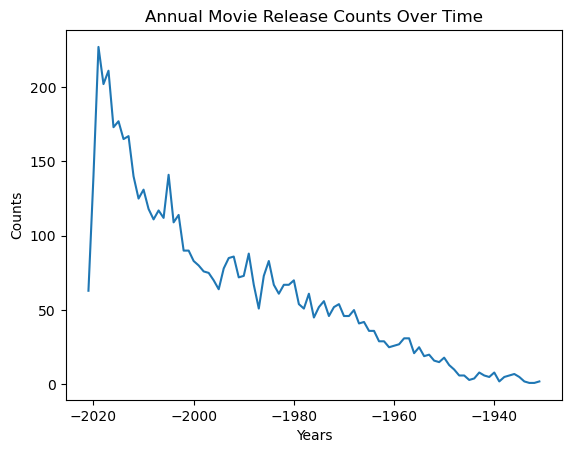

In [174]:
#TO CONNECT INDIVIDUAL DATAPOINTS
ax = sb.lineplot(data=movies['Year'].value_counts().sort_index())
ax.set_title("Annual Movie Release Counts Over Time")
ax.set_xlabel("Years")
ax.set_ylabel("Counts")
mpl.show()

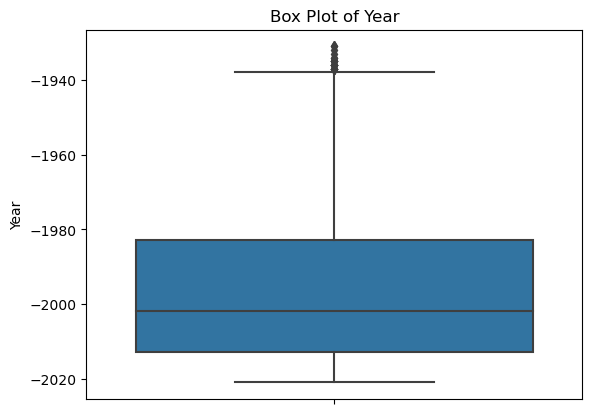

In [175]:
#TO VISUALIZE DISTRIBUTIONS
ax = sb.boxplot(data=movies, y='Year')
ax.set_ylabel('Year')
ax.set_title('Box Plot of Year')
mpl.show()

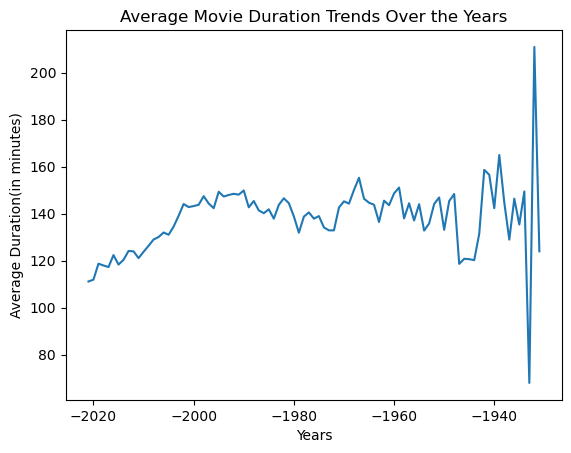

In [176]:
#TO COONECT THE DATAPOINTS BETWEEN YEARS AND DURATION
ax = sb.lineplot(data=movies.groupby('Year')['Duration'].mean().reset_index(), x='Year', y='Duration')
ax.set_title("Average Movie Duration Trends Over the Years")
ax.set_xlabel("Years")
ax.set_ylabel('Average Duration(in minutes)')
mpl.show()

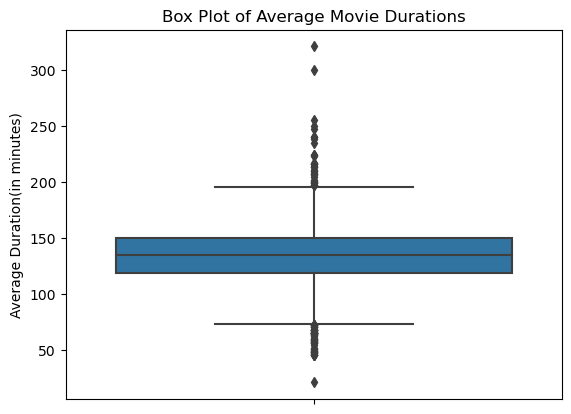

In [177]:
#TO VISUALIZE DURATION DISTRIBUTIONS
ax = sb.boxplot(data=movies, y='Duration')
ax.set_title("Box Plot of Average Movie Durations")
ax.set_ylabel('Average Duration(in minutes)')
mpl.show()

In [178]:
#TO IDENTIFY AND FILTER OUT THE OUTLIERS IN 'DURATION' COLUMN
Q1 = movies['Duration'].quantile(0.25)
Q3 = movies['Duration'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = movies[(movies['Duration'] >= lower_bound) & (movies['Duration'] <= upper_bound)]
df.head(11)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),-2019.0,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,-2019.0,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,-1997.0,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,-2005.0,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,-2012.0,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,-2014.0,116,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon
10,1:1.6 An Ode to Lost Love,-2004.0,96,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni
11,1:13:7 Ek Tera Saath,-2016.0,120,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani
12,100 Days,-1991.0,161,"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey
13,100% Love,-2012.0,166,"Comedy, Drama, Romance",5.7,512,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh


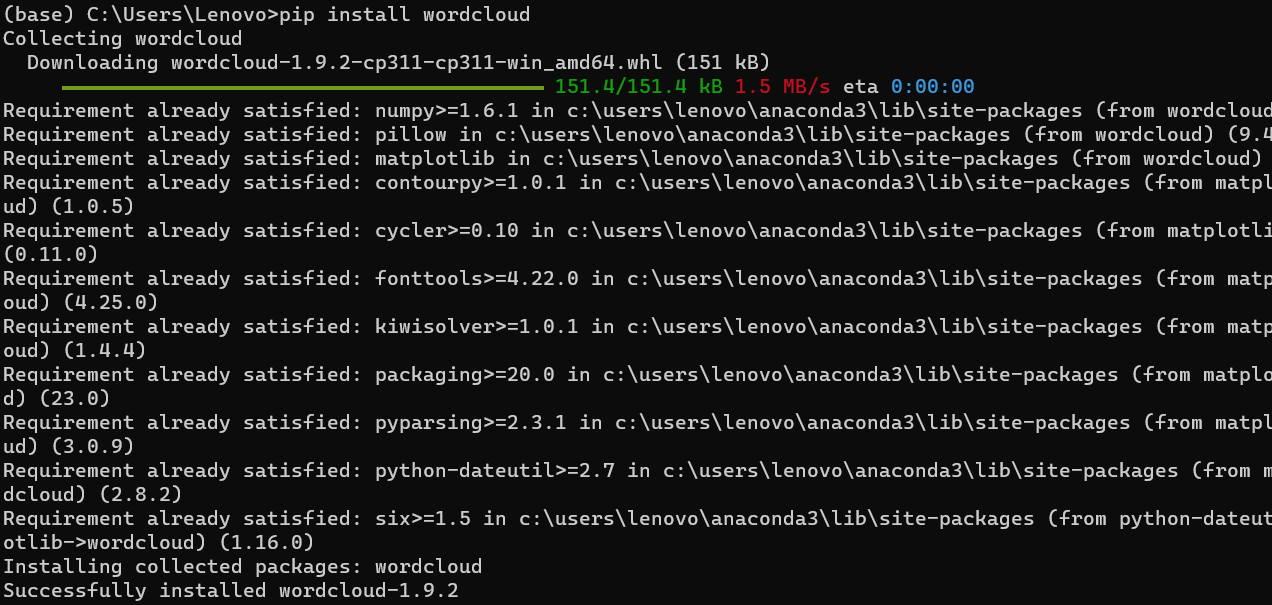
IF Wordcloud is not installed then go to cmd and install it as pip install Wordcloud


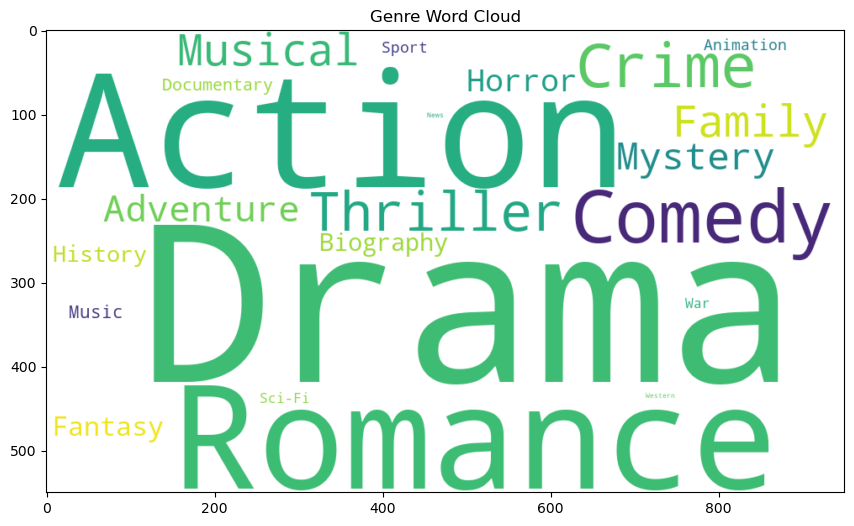

In [179]:
from wordcloud import WordCloud
genre_counts = movies['Genre'].str.split(', ', expand=True).stack().value_counts()

wordcloud = WordCloud(width=950, height=550, background_color='white').generate_from_frequencies(genre_counts)

mpl.figure(figsize=(16, 6))
mpl.imshow(wordcloud, interpolation='bilinear')
mpl.axis('on')
mpl.title('Genre Word Cloud')
mpl.show()

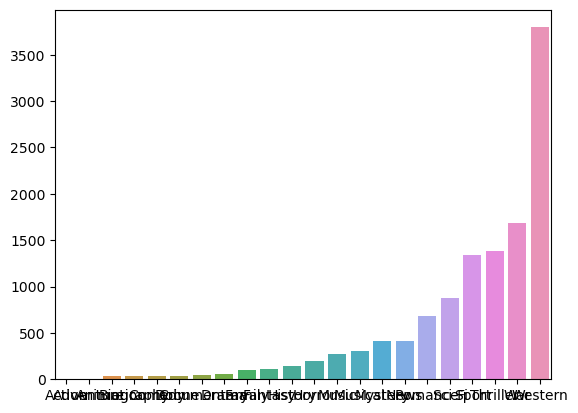

In [180]:
genreLabels = sorted(genereCounts.keys())
genreCounts = sorted(genereCounts.values())
ax = sb.barplot(x = genreLabels, y = genreCounts)
mpl.show()

In [181]:
genrePie.loc[genrePie['Count'] < 50, 'Genre'] = 'Other'
ax = px.pie(genrePie, values='Count', names='Genre', title='More than one Genre of movies in Indian Cinema')
ax.show()

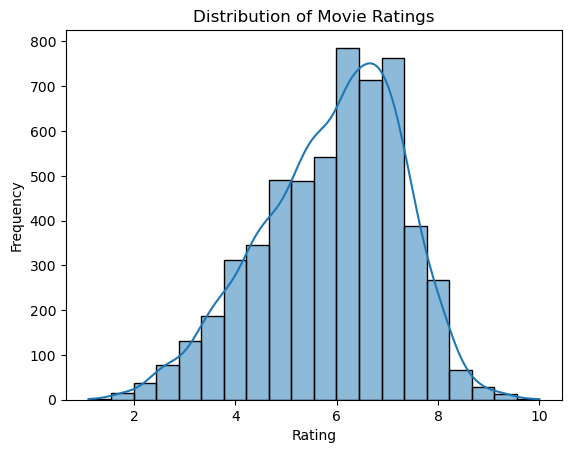

In [182]:
#TO VISUALIZE RELATIONSHIP BETWEEN RATING AND FREQUENCY
ax = sb.histplot(data = movies, x = "Rating", bins = 20, kde = True)
ax.set_xlabel('Rating')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Movie Ratings')
mpl.show()

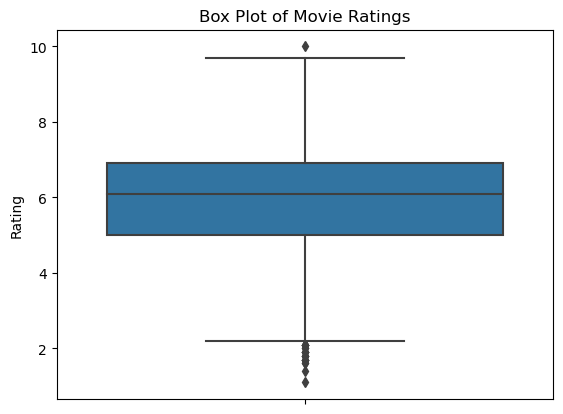

In [183]:
#TO VISUALIZE RATING DISTRIBUTIONS
ax = sb.boxplot(data=movies, y='Rating')
ax.set_ylabel('Rating')
ax.set_title('Box Plot of Movie Ratings')
mpl.show()

In [184]:
#TO IDENTIFY AND FILTER OUT THE OUTLIERS IN 'RATING' COLUMN
Q1 = movies['Rating'].quantile(0.25)
Q3 = movies['Rating'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
movie_file = movies[(movies['Rating'] >= lower_bound) & (movies['Rating'] <= upper_bound)]
movie_file.head(16)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),-2019.0,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,-2019.0,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,-1997.0,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,-2005.0,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,-2012.0,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,-2014.0,116,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon
10,1:1.6 An Ode to Lost Love,-2004.0,96,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni
11,1:13:7 Ek Tera Saath,-2016.0,120,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani
12,100 Days,-1991.0,161,"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey
13,100% Love,-2012.0,166,"Comedy, Drama, Romance",5.7,512,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh


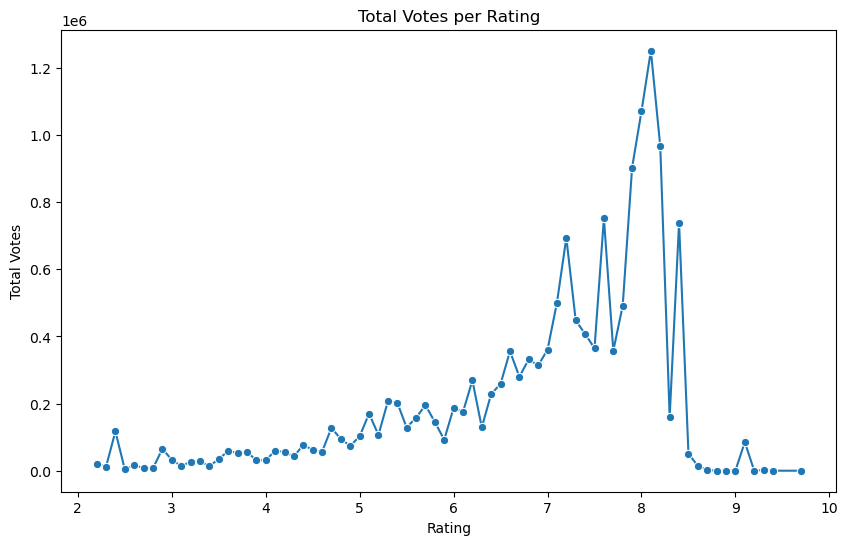

In [185]:
#CREATING A FIGURE OF LINEPLOT BASED ON RATING AND VOTES
rating_votes = movie_file.groupby('Rating')['Votes'].sum().reset_index()
mpl.figure(figsize=(10, 6))
ax_line_seaborn = sb.lineplot(data=rating_votes, x='Rating', y='Votes', marker='o')
ax_line_seaborn.set_xlabel('Rating')
ax_line_seaborn.set_ylabel('Total Votes')
ax_line_seaborn.set_title('Total Votes per Rating')
mpl.show()

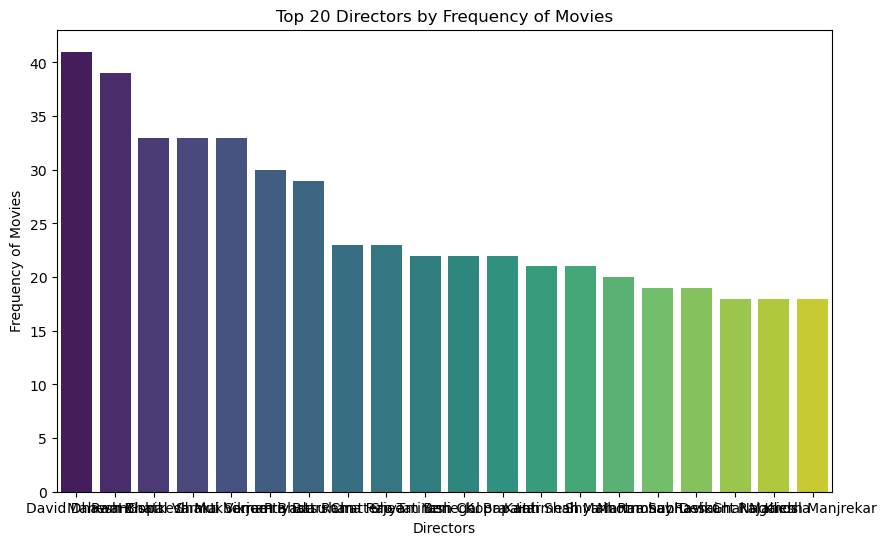

In [186]:
#CREATING A FIGURE OF BARPLOT BASED ON DIRECTOR AND FREQUENCY OF MOVIES
mpl.figure(figsize=(10, 6))
ax = sb.barplot(x=directors.head(20).index, y=directors.head(20).values, palette='viridis')
ax.set_xlabel('Directors')
ax.set_ylabel('Frequency of Movies')
ax.set_title('Top 20 Directors by Frequency of Movies')
mpl.show(11)

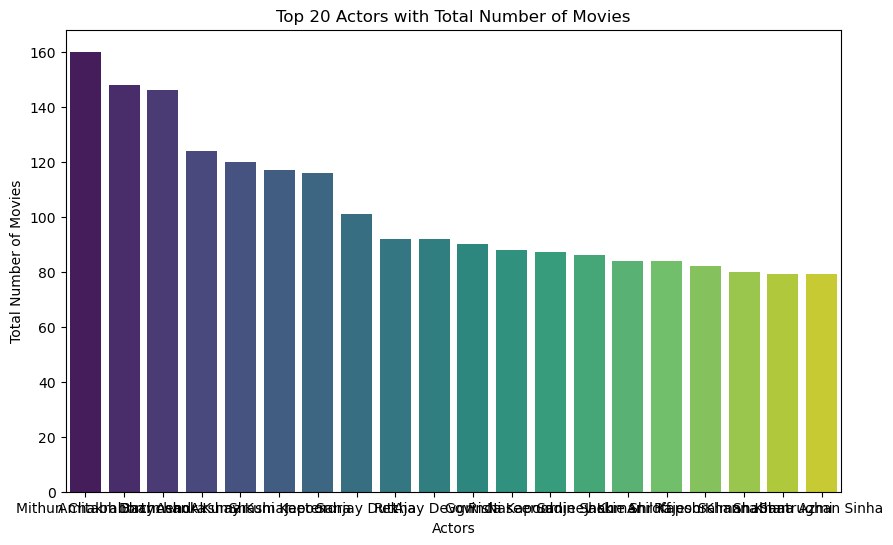

In [187]:
#CREATING A FIGURE OF BARPLOT BASED ON ACTORS AND TOTAL NO OF MOVIES
mpl.figure(figsize=(10, 6))
ax = sb.barplot(x=actors.head(20).index, y=actors.head(20).values, palette='viridis')
ax.set_xlabel('Actors')
ax.set_ylabel('Total Number of Movies')
ax.set_title('Top 20 Actors with Total Number of Movies')
mpl.show()

In [188]:
#TO PERFORM SOME DATA MANIPULATION AND ENCODING IN DATAFRAME 
movies["Actor"] = movies['Actor 1'] + ', ' + movies['Actor 2'] + ', ' + movie_file['Actor 3']
movies["Directors"] = movies['Director'].astype('category').cat.codes
movies["Genres"] = movies['Genre'].astype('category').cat.codes
movies["Actors"] = movies['Actor'].astype('category').cat.codes

In [189]:
movie_file.head(25)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),-2019.0,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,-2019.0,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,-1997.0,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,-2005.0,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,-2012.0,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,-2014.0,116,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon
10,1:1.6 An Ode to Lost Love,-2004.0,96,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni
11,1:13:7 Ek Tera Saath,-2016.0,120,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani
12,100 Days,-1991.0,161,"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey
13,100% Love,-2012.0,166,"Comedy, Drama, Romance",5.7,512,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh


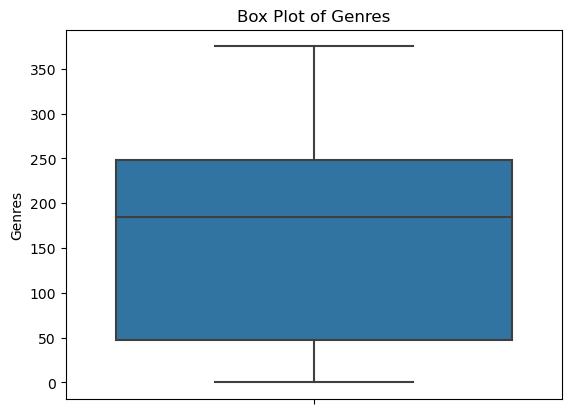

In [190]:
#TO VISUALIZE GENERES DISTRIBUTIONS
ax = sb.boxplot(data=movies, y='Genres')
ax.set_ylabel('Genres')
ax.set_title('Box Plot of Genres')
mpl.show()

In [191]:
#TO IDENTIFY AND FILTER OUT THE OUTLIERS IN 'GENERES' COLUMN
Q1 = movies['Genres'].quantile(0.25)
Q3 = movies['Genres'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
movie_file = movies[(movies['Genres'] >= lower_bound) & (movies['Genres'] <= upper_bound)]

In [192]:
movie_file.head(25)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Actor,Directors,Genres,Actors
1,#Gadhvi (He thought he was Gandhi),-2019.0,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,"Rasika Dugal, Vivek Ghamande, Arvind Jangid",629,229,3858
3,#Yaaram,-2019.0,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,"Prateik, Ishita Raj, Siddhant Kapoor",1335,184,3326
5,...Aur Pyaar Ho Gaya,-1997.0,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,"Bobby Deol, Aishwarya Rai Bachchan, Shammi Kapoor",1530,157,1112
6,...Yahaan,-2005.0,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,"Jimmy Sheirgill, Minissha Lamba, Yashpal Sharma",2044,289,2075
8,?: A Question Mark,-2012.0,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,"Yash Dave, Muntazir Ahmad, Kiran Bhatia",135,320,5535
9,@Andheri,-2014.0,116,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon,"Augustine, Fathima Babu, Byon",401,37,967
10,1:1.6 An Ode to Lost Love,-2004.0,96,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni,"Rati Agnihotri, Gulshan Grover, Atul Kulkarni",1083,229,3863
11,1:13:7 Ek Tera Saath,-2016.0,120,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani,"Pankaj Berry, Anubhav Dhir, Hritu Dudani",266,316,3213
12,100 Days,-1991.0,161,"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey,"Jackie Shroff, Madhuri Dixit, Javed Jaffrey",1374,323,1890
13,100% Love,-2012.0,166,"Comedy, Drama, Romance",5.7,512,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh,"Jeet, Koyel Mallick, Sujoy Ghosh",1506,159,1971


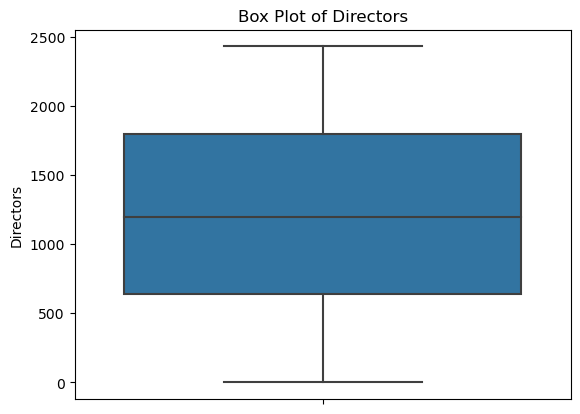

In [193]:
#TO VISUALIZE DIRECTORS DISTRIBUTIONS
ax = sb.boxplot(data=movies, y='Directors')
ax.set_ylabel('Directors')
ax.set_title('Box Plot of Directors')
mpl.show()

In [194]:
#TO IDENTIFY AND FILTER OUT THE OUTLIERS IN 'DIRECTORS' COLUMN
Q1 = movies['Directors'].quantile(0.25)
Q3 = movies['Directors'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
movies = movies[(movies['Directors'] >= lower_bound) & (movies['Directors'] <= upper_bound)]

In [195]:
movie_file.head(25)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Actor,Directors,Genres,Actors
1,#Gadhvi (He thought he was Gandhi),-2019.0,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,"Rasika Dugal, Vivek Ghamande, Arvind Jangid",629,229,3858
3,#Yaaram,-2019.0,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,"Prateik, Ishita Raj, Siddhant Kapoor",1335,184,3326
5,...Aur Pyaar Ho Gaya,-1997.0,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,"Bobby Deol, Aishwarya Rai Bachchan, Shammi Kapoor",1530,157,1112
6,...Yahaan,-2005.0,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,"Jimmy Sheirgill, Minissha Lamba, Yashpal Sharma",2044,289,2075
8,?: A Question Mark,-2012.0,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,"Yash Dave, Muntazir Ahmad, Kiran Bhatia",135,320,5535
9,@Andheri,-2014.0,116,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon,"Augustine, Fathima Babu, Byon",401,37,967
10,1:1.6 An Ode to Lost Love,-2004.0,96,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni,"Rati Agnihotri, Gulshan Grover, Atul Kulkarni",1083,229,3863
11,1:13:7 Ek Tera Saath,-2016.0,120,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani,"Pankaj Berry, Anubhav Dhir, Hritu Dudani",266,316,3213
12,100 Days,-1991.0,161,"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey,"Jackie Shroff, Madhuri Dixit, Javed Jaffrey",1374,323,1890
13,100% Love,-2012.0,166,"Comedy, Drama, Romance",5.7,512,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh,"Jeet, Koyel Mallick, Sujoy Ghosh",1506,159,1971


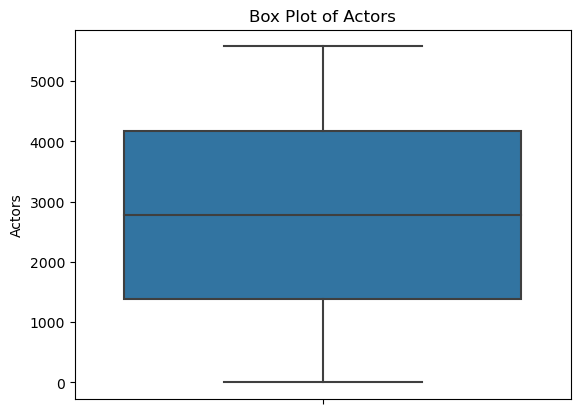

In [196]:
#TO VISUALIZE ACTORS DISTRIBUTIONS
ax = sb.boxplot(data=movies, y='Actors')
ax.set_ylabel('Actors')
ax.set_title('Box Plot of Actors')
mpl.show()

In [197]:

#TO IDENTIFY AND FILTER OUT THE OUTLIERS IN 'ACTORS' COLUMN
Q3 = movies['Actors'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
movies = movies[(movies['Actors'] >= lower_bound) & (movies['Actors'] <= upper_bound)]

In [198]:
movie_file.head(25)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Actor,Directors,Genres,Actors
1,#Gadhvi (He thought he was Gandhi),-2019.0,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,"Rasika Dugal, Vivek Ghamande, Arvind Jangid",629,229,3858
3,#Yaaram,-2019.0,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,"Prateik, Ishita Raj, Siddhant Kapoor",1335,184,3326
5,...Aur Pyaar Ho Gaya,-1997.0,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,"Bobby Deol, Aishwarya Rai Bachchan, Shammi Kapoor",1530,157,1112
6,...Yahaan,-2005.0,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,"Jimmy Sheirgill, Minissha Lamba, Yashpal Sharma",2044,289,2075
8,?: A Question Mark,-2012.0,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,"Yash Dave, Muntazir Ahmad, Kiran Bhatia",135,320,5535
9,@Andheri,-2014.0,116,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon,"Augustine, Fathima Babu, Byon",401,37,967
10,1:1.6 An Ode to Lost Love,-2004.0,96,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni,"Rati Agnihotri, Gulshan Grover, Atul Kulkarni",1083,229,3863
11,1:13:7 Ek Tera Saath,-2016.0,120,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani,"Pankaj Berry, Anubhav Dhir, Hritu Dudani",266,316,3213
12,100 Days,-1991.0,161,"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey,"Jackie Shroff, Madhuri Dixit, Javed Jaffrey",1374,323,1890
13,100% Love,-2012.0,166,"Comedy, Drama, Romance",5.7,512,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh,"Jeet, Koyel Mallick, Sujoy Ghosh",1506,159,1971


In [199]:
#SPLITTING THE DATASET INTO INPUT FEATURES (x) AND OUTPUT FEATURES (y)
Input = movies.drop(['Name', 'Genre', 'Rating', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Actor'], axis=1)
Output = movies['Rating']

In [200]:
Input.head(25)

,Year,Duration,Votes,Directors,Genres,Actors
1,-2019.0,109,8,629,229,3858
3,-2019.0,110,35,1335,184,3326
5,-1997.0,147,827,1530,157,1112
6,-2005.0,142,1086,2044,289,2075
8,-2012.0,82,326,135,320,5535
9,-2014.0,116,11,401,37,967
10,-2004.0,96,17,1083,229,3863
11,-2016.0,120,59,266,316,3213
12,-1991.0,161,983,1374,323,1890
13,-2012.0,166,512,1506,159,1971


In [201]:
Output.head(25)

1     7.0
3     4.4
5     4.7
6     7.4
8     5.6
9     4.0
10    6.2
11    5.9
12    6.5
13    5.7
15    7.4
18    6.3
21    7.2
22    4.4
25    6.6
28    7.3
30    7.1
32    5.6
33    6.9
34    3.5
36    4.5
38    6.4
39    4.1
40    4.8
41    4.5
Name: Rating, dtype: float64

In [202]:
x_train, x_test, y_train, y_test = train_test_split(Input, Output, test_size = 0.2, random_state = 1)

In [203]:
#IMPORTING THE NECESSARY LIBARIES
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score as score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [204]:
#EVALUTING THE MODEL PERFORMANCE
def evaluate_model(y_true, y_pred, model_name):
    print("Model: ", model_name)
    print("Accuracy = {:0.2f}%".format(score(y_true, y_pred)*1000))
    print("Mean Squared Error = {:0.2f}\n".format(mean_squared_error(y_true, y_pred, squared=False)))
    return round(score(y_true, y_pred)*1000, 2)

In [205]:
#TRAINING AND TESTING THE DATA
LR = LinearRegression()
LR.fit(x_train, y_train)
lr_preds = LR.predict(x_test)

RFR = RandomForestRegressor(n_estimators=100, random_state=1)
RFR.fit(x_train, y_train)
rf_preds = RFR.predict(x_test)

DTR = DecisionTreeRegressor(random_state=1)
DTR.fit(x_train, y_train)
dt_preds = DTR.predict(x_test)

XGBR = XGBRegressor(n_estimators=100, random_state=1)
XGBR.fit(x_train, y_train)
xgb_preds = XGBR.predict(x_test)

GBR = GradientBoostingRegressor(n_estimators=100, random_state=60)
GBR.fit(x_train, y_train)
gb_preds = GBR.predict(x_test)

from lightgbm import LGBMRegressor
LGBMR = LGBMRegressor(n_estimators=100, random_state=60)
LGBMR.fit(x_train, y_train)
lgbm_preds = LGBMR.predict(x_test)

from catboost import CatBoostRegressor
CBR = CatBoostRegressor(n_estimators=100, random_state=1, verbose=False)
CBR.fit(x_train, y_train)
catboost_preds = CBR.predict(x_test)

from sklearn.neighbors import KNeighborsRegressor
KNR = KNeighborsRegressor(n_neighbors=5)
KNR.fit(x_train, y_train)
knn_preds = KNR.predict(x_test)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000363 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1207
[LightGBM] [Info] Number of data points in the train set: 4527, number of used features: 6
[LightGBM] [Info] Start training from score 5.910029


In [206]:
#CHECKING MODEL AND MEAN SQUARED ERROR FOR TRAINED AND TESTED DATA 
LRScore = evaluate_model(y_test, lr_preds, "LINEAR REGRESSION")
RFScore = evaluate_model(y_test, rf_preds, "RANDOM FOREST")
DTScore = evaluate_model(y_test, dt_preds, "DECEISION TREE")
XGBScore = evaluate_model(y_test, xgb_preds, "EXTENDED GRADIENT BOOSTING")
GBScore = evaluate_model(y_test, gb_preds, "GRADIENT BOOSTING")
LGBScore = evaluate_model(y_test, lgbm_preds, "LIGHT GRADIENT BOOSTING")
CBRScore = evaluate_model(y_test, catboost_preds, "CAT BOOST")
KNNScore = evaluate_model(y_test, knn_preds, "K NEAREST NEIGHBORS")

Model:  LINEAR REGRESSION
Accuracy = 100.86%
Mean Squared Error = 1.29

Model:  RANDOM FOREST
Accuracy = 351.47%
Mean Squared Error = 1.10

Model:  DECEISION TREE
Accuracy = -274.43%
Mean Squared Error = 1.54

Model:  EXTENDED GRADIENT BOOSTING
Accuracy = 354.68%
Mean Squared Error = 1.09

Model:  GRADIENT BOOSTING
Accuracy = 373.54%
Mean Squared Error = 1.08

Model:  LIGHT GRADIENT BOOSTING
Accuracy = 403.30%
Mean Squared Error = 1.05

Model:  CAT BOOST
Accuracy = 370.61%
Mean Squared Error = 1.08

Model:  K NEAREST NEIGHBORS
Accuracy = 6.78%
Mean Squared Error = 1.36

